In [1]:
# Written by Anna C Helfeld C
# Fall 2018-Winter 2019

# This code uses my solutions written in Octave/Matlab as a guide
# Machine Learning (Andrew Ng class on Coursera)
# Homework 6: Support Vector Machines 

In [10]:
# Import libraries
from pandas import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import math as mth
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [11]:
# Use SVM to experiment with parameter C

# Make sure file exists
import os  
os.path.isfile('./ex6data1.mat')    # True  

True

In [12]:
# Load data
import h5py 
dataset1 = sio.loadmat('ex6data1.mat') 
dataset2 = sio.loadmat('ex6data2.mat') 
dataset3 = sio.loadmat('ex6data3.mat') 

In [13]:
# Put X and y data into arrays
Xdata = dataset1['X']
ydata = dataset1['y']
Alldata = np.concatenate((Xdata,ydata), axis=1)

In [14]:
Alldatadf = DataFrame(data=Alldata)  #Put data into data frame
Alldatadf.head()

,0,1,2
0,1.9643,4.5957,1.0
1,2.2753,3.8589,1.0
2,2.9781,4.5651,1.0
3,2.9320,3.5519,1.0
4,3.5772,2.8560,1.0


In [22]:
Alldatadf_ran = Alldatadf.sample(frac=1) #randomize data
Alldatadf_ran.head() #check 

,0,1,2
17,3.9113,3.4291,1.0
36,1.4919,2.0271,0.0
11,3.1048,3.0709,1.0
28,2.5057,2.3853,0.0
39,0.8122,2.9992,0.0


In [20]:
# For plotting purposes
neg = Alldatadf_ran[Alldatadf_ran.iloc[:,2] == 0]    # segment the data into pos and neg class
pos = Alldatadf_ran[Alldatadf_ran.iloc[:,2] == 1]  
pos.head()

,0,1,2
4,3.5772,2.8560,1.0
1,2.2753,3.8589,1.0
15,3.1855,4.2888,1.0
17,3.9113,3.4291,1.0
9,2.5518,4.6162,1.0


In [26]:
# Split into training data and cross-validation data
Xtrain = Alldatadf_ran.iloc[0:int(Alldatadf_ran.shape[0]*0.8),0:-1]
ytrain = Alldatadf_ran.iloc[0:int(Alldatadf_ran.shape[0]*0.8),-1]

Xcv = Alldatadf_ran.iloc[int(Alldatadf_ran.shape[0]*0.8):Alldatadf_ran.shape[0],0:-1]
ycv = Alldatadf_ran.iloc[int(Alldatadf_ran.shape[0]*0.8):Alldatadf_ran.shape[0],-1]

In [27]:
# Put into arrays
Xtrain_a = Xtrain.values
ytrain_a = ytrain.values
Xcv_a = Xcv.values
ycv_a = ycv.values

In [28]:
# Test how penalty C - similar to "inverse" of regularization - affects linear SVM

clf = LinearSVC(C=1.0, max_iter = 1000,fit_intercept = True).fit(Xtrain_a,ytrain_a)

In [29]:
clf.coef_[0][1]

0.7240542182540204

In [30]:
clf.intercept_[0]

-3.3060829802691822

In [31]:
# For plotting
bins = 48
inc = 0.1
Xplot=np.zeros((bins,2))
yplot=np.zeros((bins,1))
for i in range(0,bins):
    Xplot[i,0]=-float(0)+(inc*float(i))
    Xplot[i,1]=1.5+(inc*float(i))
    yplot[i]=-(clf.coef_[0][0]*Xplot[i,0]+clf.intercept_[0])/clf.coef_[0][1]

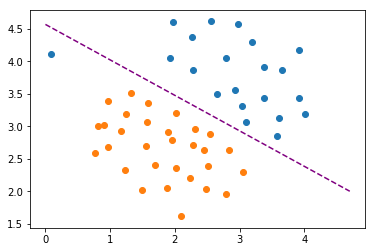

In [32]:
# Plot data to see what it looks like
pos_plot = plt.scatter(pos.values[:,0], pos.values[:,1])
neg_plot = plt.scatter(neg.values[:,0], neg.values[:,1])

# Plot decision boundary
decision = plt.plot(Xplot[:,0], yplot[:],linestyle='dashed', color = 'purple')

Text(0.5,1,'Decision Boundary for Different Parameters C')

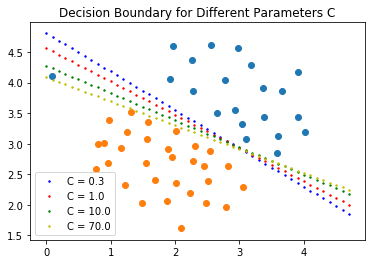

In [36]:
# Plot data to see what it looks like
pos_plot = plt.scatter(pos.values[:,0], pos.values[:,1])
neg_plot = plt.scatter(neg.values[:,0], neg.values[:,1])

# Loop over different values of C
C_test = [0.3, 1, 10, 70]
colors = ['b', 'r', 'g', 'y']
for j in range(0,4):
    clf = LinearSVC(C=C_test[j], max_iter = 8000,fit_intercept = True).fit(Xtrain_a,ytrain_a)
    for i in range(0,bins):
        Xplot[i,0]=-float(0)+(inc*float(i))
        Xplot[i,1]=1.5+(inc*float(i))
        yplot[i]=-(clf.coef_[0][0]*Xplot[i,0]+clf.intercept_[0])/clf.coef_[0][1]
    dec = plt.scatter(Xplot[:,0], yplot[:], s=2, c = colors[j], label = 'C = %2.1f' % C_test[j])
plt.legend()
plt.title('Decision Boundary for Different Parameters C')

In [34]:
# Predict using C = 1

clf = LinearSVC(C=1, max_iter = 8000,fit_intercept = True).fit(Xtrain_a,ytrain_a)

In [35]:
clf.predict(Xcv_a)-ycv_a

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])